### Introduction

Retailkart.com is a small and medium-scale organization that deals in wine, fruit and meat products, holding around 35% offline market share. The company has been leading the domain offline for a long time. Due to increased competition, they decided to move online as well. But there are many challenges that the company has to overcome to stay competitive in the market.

Customer segmentation: is necessary in order to understand customers behaviors. It leverages aqcuired customer data like the one we have in our case, transactions data in order to divide customers into groups.

We will do RFM(Recency, Frequency, Monetary) Analysis as a first step and then combine RFM with predictive algorithms (k-means).
1. Recency-> How Recent customer have purchased?
2. Frequency-> How frequent do they purchase?
3. Monetary-> How much amount do they spend?

### Read and understand the data

In [1]:
import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

warnings.filterwarnings("ignore")

#modules for predictive models
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#load the dataset
retail_df = pd.read_csv("CustomerPurchaseData.csv", encoding="UTF-8")
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,387,1976,Basic,Married,7500.0,0,0,13/11/12,59,6,...,8,0,0,0,0,0,0,3,11,0.0
1,8373,1979,Basic,Together,24594.0,1,0,10/12/13,94,1,...,5,0,0,0,0,0,0,3,11,0.0
2,5342,1976,Basic,Divorced,9548.0,1,0,08/08/12,31,0,...,8,0,0,0,0,0,0,3,11,0.0
3,2563,1961,Basic,Married,28249.0,0,0,15/06/14,80,1,...,6,0,0,0,0,0,0,3,11,0.0
4,9733,1978,Basic,Together,24882.0,1,0,09/09/12,52,1,...,6,1,0,0,0,0,0,3,11,0.0


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2238 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntSnacksProds       2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

In [4]:
retail_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2239.000000,2239.000000,2238.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.0,2239.0,2216.000000
mean,9149.564538,1968.802144,51435.772118,0.443502,0.500223,49.121036,304.067441,26.307727,167.016525,37.538633,...,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,0.009379,3.0,11.0,0.150271
std,10605.188253,11.985494,22047.706404,0.537513,0.543772,28.963662,336.614830,39.781468,225.743829,54.637617,...,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,0.096412,0.0,0.0,0.357417
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,3383.500000,1959.000000,34730.500000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,6019.000000,1970.000000,51075.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,9043.500000,1977.000000,68279.250000,1.000000,1.000000,74.000000,504.500000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,47392.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
retail_df.shape

(2239, 29)

### Data Cleaning

In [6]:
#Checking null values
retail_df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                  1
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntSnacksProds          0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response               23
dtype: int64

##### Handling Missing Values

We have only 1 missing value in "Income" column, which can be replaced by 0.
And "Response" column has 23 missing values we would need to replace these with some approximation.

In [7]:
#Handling nulls of "Response" column
cols= ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
for col in cols:
    if retail_df[col].any()==1:
        value='1'
    else:
        value='0'
retail_df["Response"].fillna(value, inplace=True)

In [8]:
retail_df["Response"].isnull().sum()

0

In [9]:
#We have one null value in "Income" column replacing it with "0"
retail_df["Income"].fillna(0, inplace=True)

In [10]:
retail_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntSnacksProds         0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

###### Now, we are not having any null values, we can proceed further, let's have a look at unique values present in columns.

In [11]:
retail_df.nunique()

ID                     2238
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1976
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntSnacksProds          213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  3
dtype: int64

Here we can observe that there are columns which contain single values in the whole column so, they have no relevance in the model development. So, we can drop columns "Z_CostContact" & "Z_Revenue".

In [12]:
retail_df.drop(columns=["Z_CostContact","Z_Revenue"],inplace=True)

Dataset has a column Dt_Customer which contains the date column, we can convert into 3 columns i.e. day, month, year. 

In [13]:
Dt_parts = retail_df["Dt_Customer"].str.split("/", n=3, expand=True)
retail_df["Dt_Day"] = Dt_parts[0].astype('int')
retail_df["Dt_Month"] = Dt_parts[1].astype('int')
retail_df["Dt_Year"] = Dt_parts[2].astype('int')

In [14]:
#Now we can drop 'Dt_Customer' column as well
retail_df.drop(columns=["Dt_Customer"],inplace=True)

In [15]:
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Day,Dt_Month,Dt_Year
0,387,1976,Basic,Married,7500.0,0,0,59,6,16,...,0,0,0,0,0,0,0.0,13,11,12
1,8373,1979,Basic,Together,24594.0,1,0,94,1,3,...,0,0,0,0,0,0,0.0,10,12,13
2,5342,1976,Basic,Divorced,9548.0,1,0,31,0,1,...,0,0,0,0,0,0,0.0,8,8,12
3,2563,1961,Basic,Married,28249.0,0,0,80,1,9,...,0,0,0,0,0,0,0.0,15,6,14
4,9733,1978,Basic,Together,24882.0,1,0,52,1,4,...,1,0,0,0,0,0,0.0,9,9,12


In [16]:
#Creating a column 'Total_mnt' by calculating Total amount by adding amount of different products
retail_df['Total_mnt']=retail_df['MntWines']+retail_df['MntFruits']+retail_df['MntMeatProducts']+retail_df['MntFishProducts']+retail_df['MntSweetProducts']+retail_df['MntSnacksProds']

In [17]:
#Creating a column 'Total_Num_Purchases' by adding purchases from different sources
retail_df['Total_Num_Purchases']=retail_df['NumDealsPurchases']+retail_df['NumWebPurchases']+retail_df['NumCatalogPurchases']+retail_df['NumStorePurchases']+retail_df['NumWebVisitsMonth']

In [18]:
retail_df['Total_mnt']

0         61
1         29
2         29
3         43
4         80
        ... 
2234    1853
2235     521
2236    1435
2237      53
2238    1679
Name: Total_mnt, Length: 2239, dtype: int64

In [19]:
retail_df['Total_Num_Purchases']

0       14
1       10
2       14
3       12
4       11
        ..
2234    28
2235    30
2236    21
2237    18
2238     1
Name: Total_Num_Purchases, Length: 2239, dtype: int64

In [20]:
#checking max/min recency to get some insight about most recent customer
max(retail_df["Recency"]), min(retail_df["Recency"])

(99, 0)

### Data Visualization and Analysis

In [21]:
retail_df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntSnacksProds           int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                object
Dt_Day                   int32
Dt_Month                 int32
Dt_Year                  int32
Total_mnt                int64
Total_Num_Purchases      int64
dtype: object

Columns "Education" & "Marital_Status" are of object type and "Response" & "Income" are of float type.

###### Exploratory Data Analysis

In [22]:
floats, objects = [], []
for col in retail_df.columns:
    if retail_df[col].dtype == object:
        objects.append(col)
    elif retail_df[col].dtype == float:
        floats.append(col)

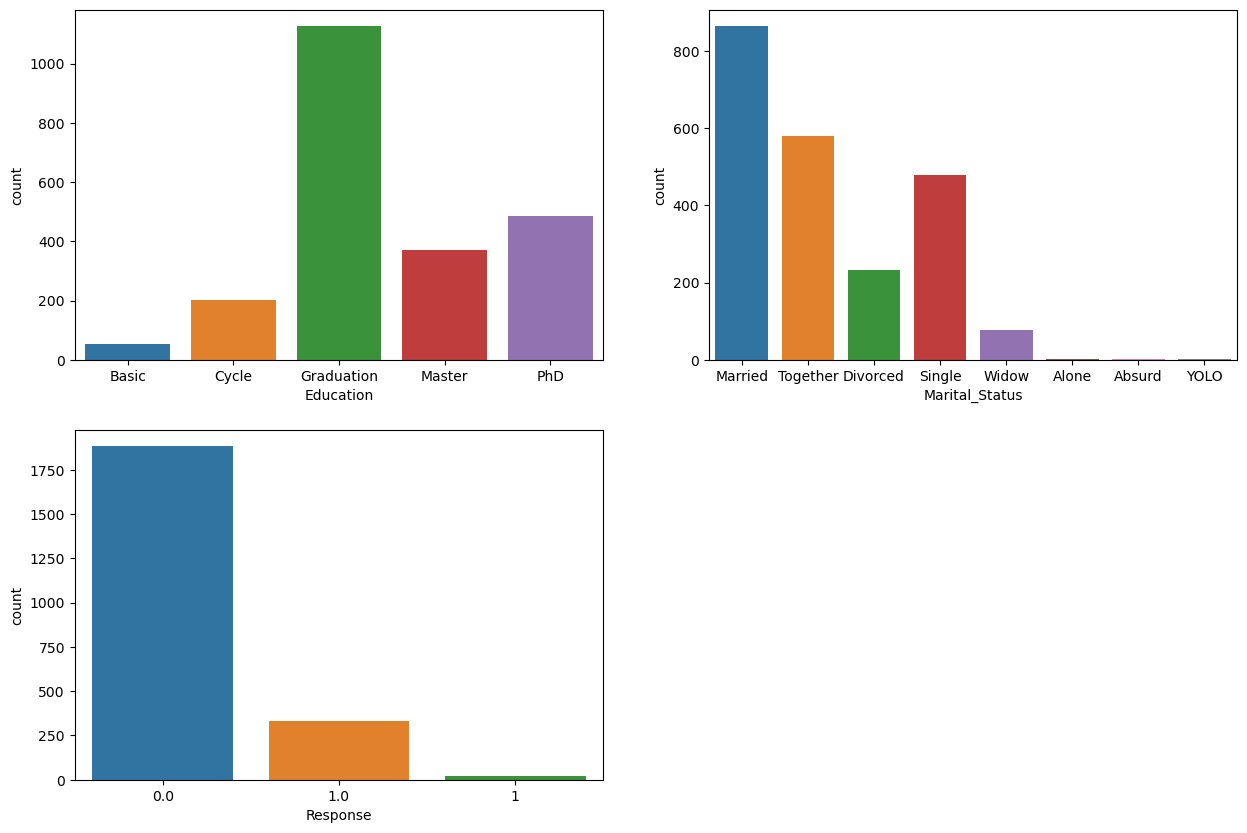

In [23]:
#Using Subplot 
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, data = retail_df)
plt.show()

In [24]:
retail_df['Marital_Status'].value_counts()

Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

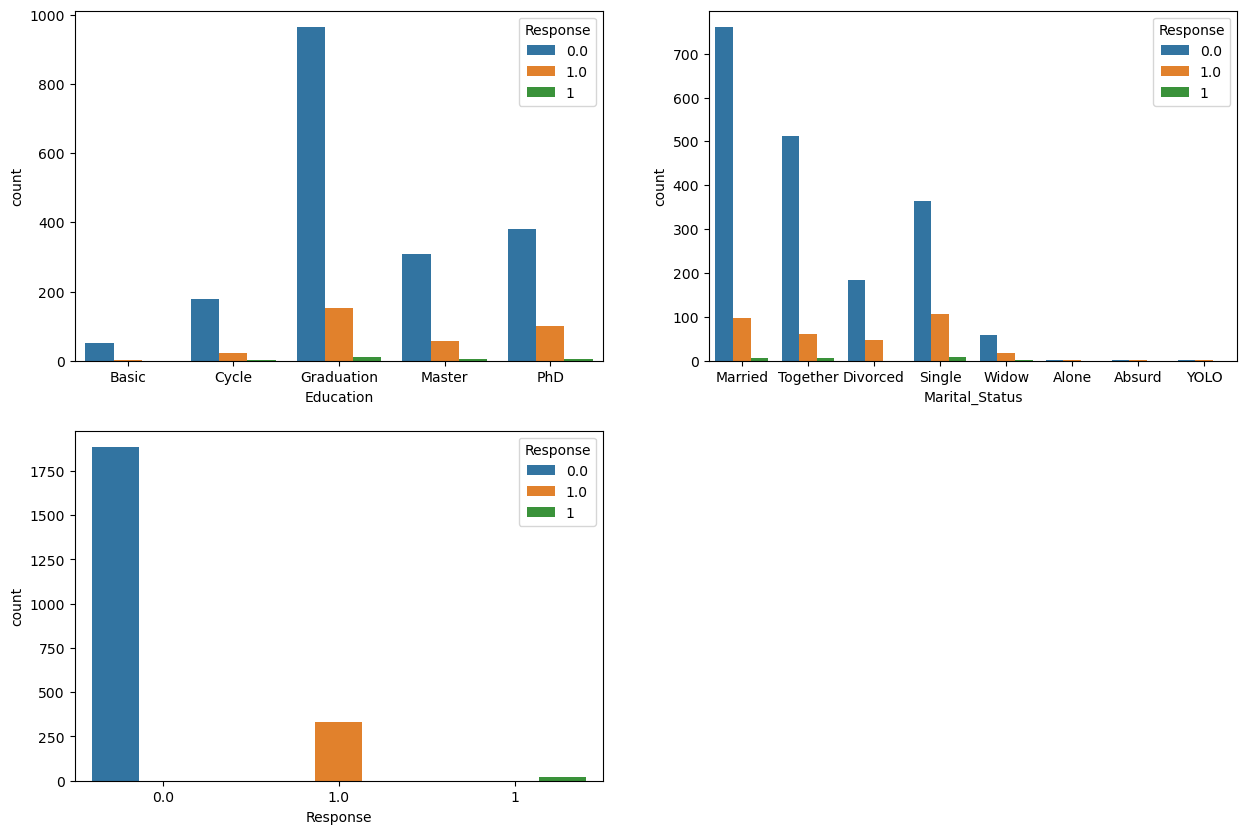

In [25]:
# Now lets see the comparison of the features with respect to the values of the responses.
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=retail_df[col], hue=retail_df['Response'])
plt.show()

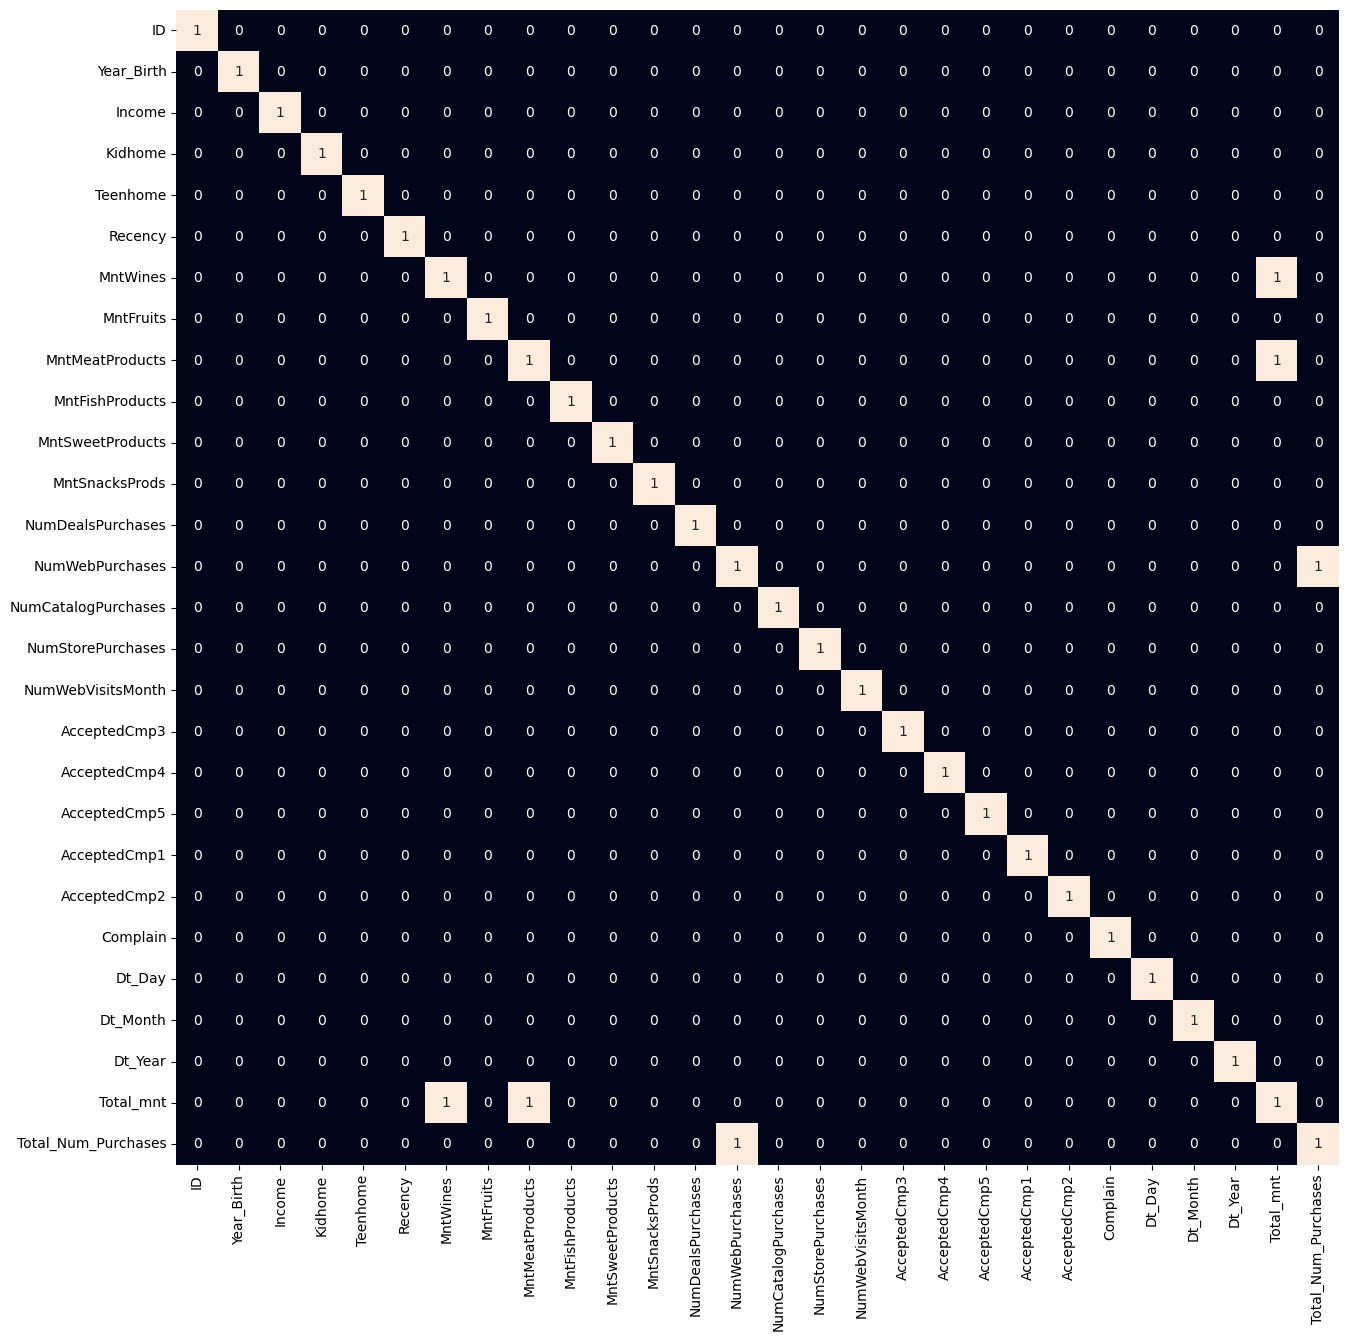

In [26]:
#Let's find out co-relations among variable using Heat map
plt.figure(figsize=(15, 15))
sns.heatmap(retail_df.corr() > 0.8, annot=True, cbar=False)
plt.show()

Standardization is the method of feature scaling which is an integral part of feature engineering. It scales down the data and making it easier for the machine learning model to learn from it. It reduces the mean to ‘0’ and the standard deviation to ‘1’.

### Prepare the data for modelling

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [27]:
# monetary
grouped_df = retail_df.groupby('ID')['Total_mnt'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,ID,Total_mnt
0,0,1198
1,1,577
2,9,120
3,13,32
4,17,1028


In [28]:
#Total_mnt as monetary
grouped_df.columns = ['ID', 'monetary']
grouped_df.head()

,ID,monetary
0,0,1198
1,1,577
2,9,120
3,13,32
4,17,1028


In [29]:
# frequency
frequency = retail_df.groupby('ID')['Total_Num_Purchases'].sum()
frequency = frequency.reset_index()
frequency.head()

,ID,Total_Num_Purchases
0,0,18
1,1,23
2,9,19
3,13,12
4,17,33


In [30]:
#Considering Total_Num_Purchases as frequency
frequency.columns = ['ID', 'frequency']
frequency.head()

,ID,frequency
0,0,18
1,1,23
2,9,19
3,13,12
4,17,33


In [31]:
#merging dataframe of monetary & frequency
# merge the two dfs
grouped_df = pd.merge(grouped_df, frequency, on='ID', how='inner')
grouped_df.head()

,ID,monetary,frequency
0,0,1198,18
1,1,577,23
2,9,120,19
3,13,32,12
4,17,1028,33


##### Now, we have gotten the frequency & monetary
##### Recency is already present in our data set

In [32]:
retail_df["Recency"].head()

0    59
1    94
2    31
3    80
4    52
Name: Recency, dtype: int64

In [33]:
retail_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Dt_Day,Dt_Month,Dt_Year,Total_mnt,Total_Num_Purchases
0,387,1976,Basic,Married,7500.0,0,0,59,6,16,...,0,0,0,0,0.0,13,11,12,61,14
1,8373,1979,Basic,Together,24594.0,1,0,94,1,3,...,0,0,0,0,0.0,10,12,13,29,10
2,5342,1976,Basic,Divorced,9548.0,1,0,31,0,1,...,0,0,0,0,0.0,8,8,12,29,14
3,2563,1961,Basic,Married,28249.0,0,0,80,1,9,...,0,0,0,0,0.0,15,6,14,43,12
4,9733,1978,Basic,Together,24882.0,1,0,52,1,4,...,0,0,0,0,0.0,9,9,12,80,11


In [34]:
#Let's get the recency column from database 
grouped_df = grouped_df.join(retail_df["Recency"])

In [35]:
grouped_df.head()

,ID,monetary,frequency,Recency
0,0,1198,18,59
1,1,577,23,94
2,9,120,19,31
3,13,32,12,80
4,17,1028,33,52


###### Let's move on to outlier treatment now

<Axes: >

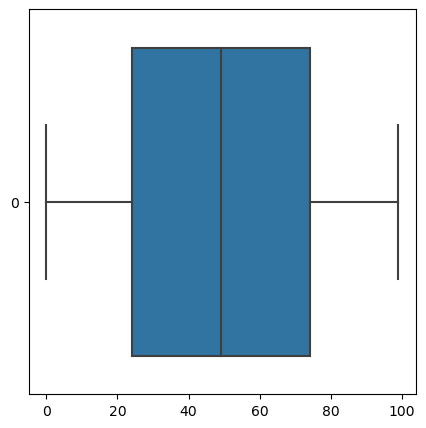

In [36]:
# plotting a boxplot to check if there are outliers
plt.figure(figsize=(5,5))
sns.boxplot(grouped_df['Recency'], orient='h')

<Axes: >

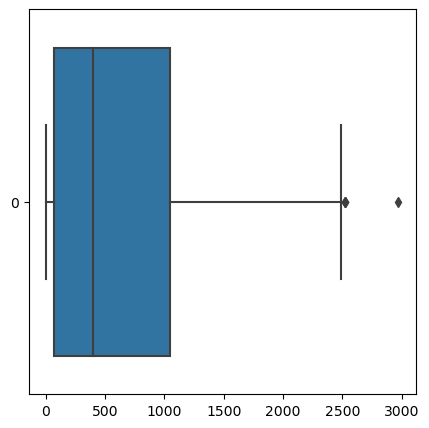

In [37]:
plt.figure(figsize=(5, 5))
sns.boxplot(grouped_df['monetary'], orient="h")

<Axes: >

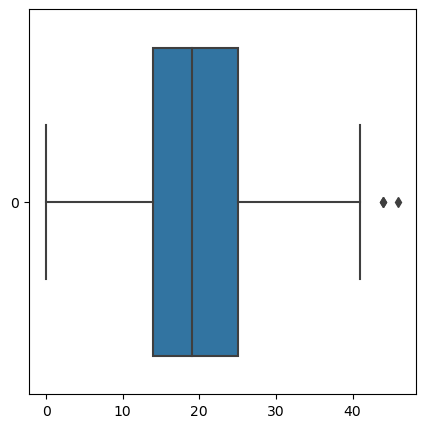

In [38]:
plt.figure(figsize=(5, 5))
sns.boxplot(grouped_df['frequency'], orient="h")

In [39]:
# removing (statistical) outliers
Q1 = grouped_df.monetary.quantile(0.05)
Q3 = grouped_df.monetary.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.monetary >= Q1 - 1.5*IQR) & (grouped_df.monetary <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.frequency.quantile(0.05)
Q3 = grouped_df.frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.frequency >= Q1 - 1.5*IQR) & (grouped_df.frequency <= Q3 + 1.5*IQR)]

In [40]:
# 2. rescaling
rfm_df = grouped_df[['monetary', 'frequency', 'Recency']]
rfm_df

,monetary,frequency,Recency
0,1198,18,59
1,577,23,94
2,120,19,31
3,32,12,80
4,1028,33,52
...,...,...,...
2233,907,32,18
2234,599,22,38
2235,1456,22,31
2236,109,17,42


In [41]:
# instantiate
scaler = StandardScaler()

In [42]:
# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[ 0.98011331, -0.29957284,  0.34114252],
       [-0.04855424,  0.38469336,  1.54955807],
       [-0.8055608 , -0.1627196 , -0.62558993],
       ...,
       [ 1.40748244,  0.24784012, -0.62558993],
       [-0.82378197, -0.43642608, -0.24580218],
       [-0.54218215, -0.43642608, -1.45421774]])

In [43]:
#Let's convert the numpy array that you have to a dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['monetary', 'frequency', 'Recency']
rfm_df_scaled.head()

,monetary,frequency,Recency
0,0.980113,-0.299573,0.341143
1,-0.048554,0.384693,1.549558
2,-0.805561,-0.162720,-0.625590
3,-0.951330,-1.120692,1.066192
4,0.698513,1.753226,0.099459


#### Hopkins Statistics

In [44]:
# Let's check cluster tendency using Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [45]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.8623764021251528

###### We can see value of Hopkins statistic is close to 1 (around 0.8).Hence, the dataset is significantly clusterable.

### Modelling/Customer Segmentation

In [46]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [47]:
kmeans.labels_

array([2, 2, 0, ..., 1, 0, 0])

In [48]:
#help(KMeans)

#### Finding the Optimal Number of Clusters/SSD

Before we start clustering using K-means Algorithm, let's find optimal number of cluster(value of K element)

#####  Elbow Curve

In [49]:
# elbow-curve/SSD
ssd = []
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
ssd

[3889.439983810222,
 2895.883561665997,
 2212.7906142705597,
 1861.9661351445482,
 1641.413019003774,
 1454.8689538079852,
 1302.8316457804083]

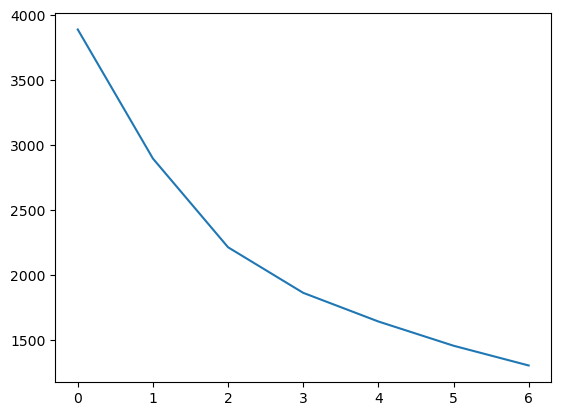

In [50]:
# plot the SSDs for each n_clusters 
plt.plot(ssd)

Note: 0,1,2,3 are 2,3,4,5 here

##### Silhouette Analysis
silhouette score=𝑝−𝑞𝑚𝑎𝑥(𝑝,𝑞)
 
𝑝
  is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞
  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [51]:
# Let's check the Silhouette Scores now.
range_n_clusters = range(2,9)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3823208415317851
For n_clusters=3, the silhouette score is 0.34740308865340097
For n_clusters=4, the silhouette score is 0.35004362681361306
For n_clusters=5, the silhouette score is 0.35470845887454633
For n_clusters=6, the silhouette score is 0.3442726347168092
For n_clusters=7, the silhouette score is 0.3506135458529821
For n_clusters=8, the silhouette score is 0.320449180271342


According to above analysis we can conclude that we can go with n_clusters=4, as in the elbow curve 4 has a sharp elbow,also in silhouette analysis n_clusters=2 has maximum scores, according to business perspective we can take value greater than 2, at value 4 & 5, silhouette score is 0.35, which is maximum 2nd value after 0.38.So, when we have a look values from both analysis, then n_clusters= 4 is the best option.

In [52]:
#Let's go ahead with n_clusters=4 and use K-Means clustering.
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [53]:
kmeans.labels_

array([1, 1, 0, ..., 3, 0, 0])

In [54]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,ID,monetary,frequency,Recency,cluster_id
0,0,1198,18,59,1
1,1,577,23,94,1
2,9,120,19,31,0
3,13,32,12,80,2
4,17,1028,33,52,1


<Axes: xlabel='cluster_id', ylabel='monetary'>

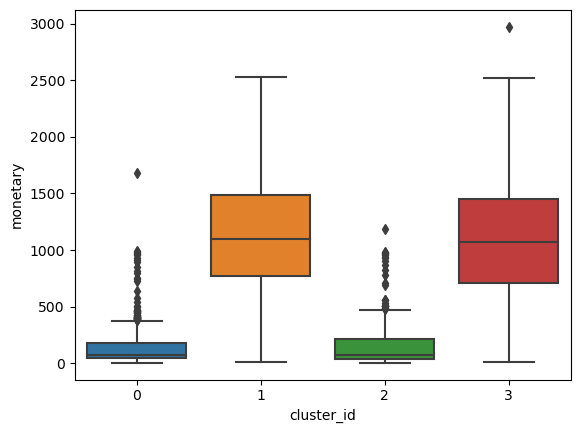

In [55]:
#Box plot of monetary with cluster_id
sns.boxplot(x='cluster_id', y='monetary', data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='frequency'>

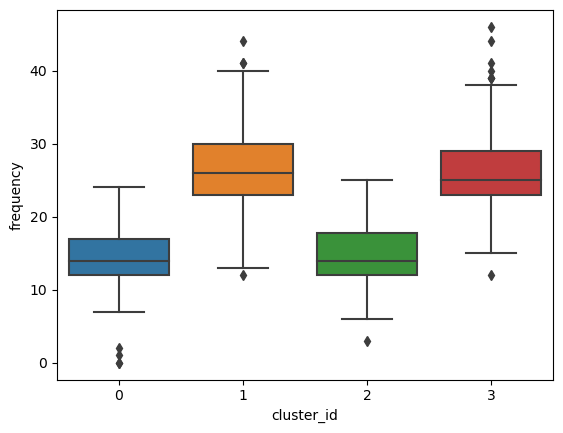

In [56]:
#Box plot of frequency with cluster_id
sns.boxplot(x='cluster_id', y='frequency', data=grouped_df)

<Axes: xlabel='cluster_id', ylabel='Recency'>

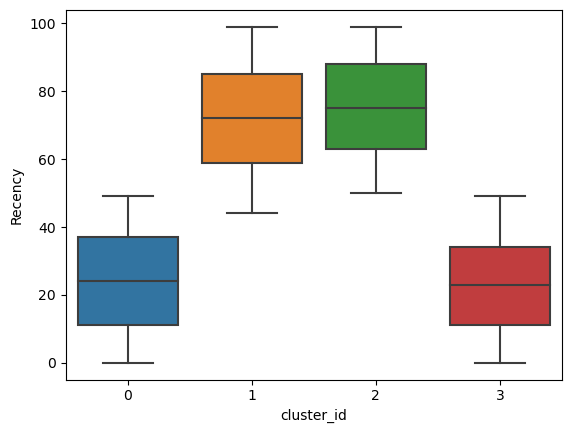

In [57]:
#Box plot of Recency with cluster_id
sns.boxplot(x='cluster_id', y='Recency', data=grouped_df)

###### We can see from above plots that customers with cluster_id '0' are most recent customers.

#### WIth these plots we are done with the Segmentation